In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats.kde import gaussian_kde

%matplotlib inline

Analysis of hashtags distribution to understand how to filter them: the objective is to keep only the most important, that are able to map communities of users with same interests

In [2]:
tags = pd.read_csv('raw-data/tag.csv', dtype=object)
tags.head()

,tag,id_post
0,tasselearrings,1636842385063323219
1,gxgcollective,1636842385063323219
2,australianbrand,1636842385063323219
3,gxgcollective,1636667639059249501
4,wanderlust,1636667639059249501


In [3]:
print 'Number of hashtags: {}'.format(tags.shape[0])
print 'Number of distinct hashtags: {}'.format(len(tags['tag'].unique()))

Number of hashtags: 1424611
Number of distinct hashtags: 164842


In [4]:
# distribution without filtering
tag_distr = tags.groupby('tag')[['id_post']].count()
tag_distr = tag_distr.sort_values(by='id_post', ascending=False)
tag_distr.head(25)

,id_post
tag,
fashion,9752
style,7908
travel,7859
love,7721
italy,6918
instagood,5223
summer,5099
inspiration,4985
picoftheday,4786


In [5]:
file = open('raw-data/stop_words.txt', 'r')
stop_words = file.readlines()
stop_words = [x.replace('\r\n','') for x in stop_words]
print len(stop_words)

55


In [6]:
tags = tags[~tags['tag'].isin(stop_words)]

In [7]:
print 'Number of hashtags: {}'.format(tags.shape[0])
print 'Number of distinct hashtags: {}'.format(len(tags['tag'].unique()))

Number of hashtags: 1315677
Number of distinct hashtags: 164787


In [8]:
# distirbution with stop-words removed
tag_distr = tags.groupby('tag')[['id_post']].count()
tag_distr = tag_distr.sort_values(by='id_post', ascending=False)
tag_distr.head(25)

,id_post
tag,
summer,5099
inspiration,4985
design,4427
art,4263
interiordesign,3978
michelela,3681
lifestyle,3654
luxury,3538
london,3250


In [12]:
tag_distr.groupby(pd.cut(tag_distr['id_post'], np.arange(0, 5501, 100))).count()

,id_post
id_post,
"(0, 100]",162832
"(100, 200]",1004
"(200, 300]",365
"(300, 400]",147
"(400, 500]",105
"(500, 600]",72
"(600, 700]",55
"(700, 800]",35
"(800, 900]",30


In [35]:
tag_distr[tag_distr['id_post']< 100].shape[0]

162798

In [43]:
not_frequent_tags = list(tag_distr[tag_distr['id_post']< 100].index)
not_frequent_tags

['metaphysicalimage',
 'nightout',
 'pictureperfect',
 'pendants',
 'gay',
 'francia',
 'power',
 'wood',
 'sundaymood',
 'yazmodas',
 'coconut',
 'lagodigarda',
 'instyle',
 'staytuned',
 'neon',
 'zzzzz',
 'belmond',
 'volgopuglia',
 'ontherun',
 'recipe',
 'levisukraine',
 'nightlife',
 'artribune',
 'lemon',
 'jungle',
 'etro',
 'postcard',
 'loveyourself',
 'artigianato',
 'dogsofinsta',
 'wa',
 'vintageclothing',
 'innovation',
 'girlsgoneglobal',
 'patmosaktis',
 'contemporaryjewelry',
 'oldtownalexandria',
 'castle',
 'biarritz',
 'pearls',
 'andreas',
 'conceptstore',
 'montecarlo',
 'happyfriday',
 'californiariviera',
 'villaforrent',
 'lebristolparis',
 'thegoodlife',
 'just',
 'artaspen',
 'peonies',
 'freshflowers',
 'awardsseason',
 'wishyouwerehere',
 'letteringart',
 'ceramic',
 'pocketart',
 'vivaglammagazine',
 'mylove',
 'tradeshow',
 'salonedelmobile',
 'rowseventravel',
 'menfashion',
 'sjv10',
 'paros',
 'unesco',
 'fashionpost',
 'olympia',
 'legend',
 'calabasa

## Hashtag-User Distribution

Compute how many users use an hashtag, for each hashtag and compare with the overall frequency

In [16]:
post = pd.read_csv('raw-data/post.csv', sep='\t', dtype=object)[['id_post', 'username', 'owner']]
post.head()

,id_post,username,owner
0,1636842385063323219,gxgcollective,2964555295
1,1636667639059249501,gxgcollective,2964555295
2,1635907116583816031,gxgcollective,2964555295
3,1635853795965600449,gxgcollective,2964555295
4,1635593889484344162,gxgcollective,2964555295


In [17]:
post.shape

(287195, 3)

In [18]:
usertags = tags.merge(post, on='id_post')

In [19]:
usertags.shape

(1351134, 4)

In [20]:
usertags.head()

,tag,id_post,username,owner
0,tasselearrings,1636842385063323219,gxgcollective,2964555295
1,gxgcollective,1636842385063323219,gxgcollective,2964555295
2,australianbrand,1636842385063323219,gxgcollective,2964555295
3,gxgcollective,1636667639059249501,gxgcollective,2964555295
4,wanderlust,1636667639059249501,gxgcollective,2964555295


In [21]:
# to avoid nested query, drop the post id and keep the pair user-tag as unique key
# in this way we can easily compute how many users use each tag (losing the frequency for each user)
usertags.drop_duplicates(subset=['tag', 'username'], inplace=True)

In [22]:
usertags.shape

(348124, 4)

In [23]:
usertags

,tag,id_post,username,owner
0,tasselearrings,1636842385063323219,gxgcollective,2964555295
1,gxgcollective,1636842385063323219,gxgcollective,2964555295
2,australianbrand,1636842385063323219,gxgcollective,2964555295
4,wanderlust,1636667639059249501,gxgcollective,2964555295
7,silktasselkeychain,1635907116583816031,gxgcollective,2964555295
8,turquoise,1635907116583816031,gxgcollective,2964555295
12,luxejewellery,1635593889484344162,gxgcollective,2964555295
14,australianlabel,1635593889484344162,gxgcollective,2964555295
17,colour,1633250255677983775,gxgcollective,2964555295
18,ombre,1633250255677983775,gxgcollective,2964555295


In [44]:
taguser_distr = usertags.groupby('tag')[['id_post']].count()
taguser_distr.columns = ['#users']
taguser_distr.sort_values(by='#users', ascending=False, inplace=True)
taguser_distr

,#users
tag,
summer,505
art,381
sunset,375
beach,348
spring,324
flowers,312
nature,304
friends,284
design,279


In [45]:
taguser_distr[taguser_distr['#users'] == 1].shape[0]

130525

In [46]:
relevant_tags = taguser_distr[taguser_distr['#users'] > 1]
relevant_tags

,#users
tag,
summer,505
art,381
sunset,375
beach,348
spring,324
flowers,312
nature,304
friends,284
design,279


In [47]:
relevant_tags = relevant_tags[~relevant_tags.index.isin(not_frequent_tags)]

In [48]:
relevant_tags.shape[0]

1692

In [49]:
relevant_tags.to_csv('raw-data/relevant_tags.csv')

## Entropy

Following paper indication, we can compute the entropy of each user as a proxy for user's attention about topics

In [19]:
# build for each user the vector with the frequency of each tag used
data = tags.merge(post, on='id_post')

In [20]:
data.head()

,tag,id_post,username,owner
0,tasselearrings,1636842385063323219,gxgcollective,2964555295
1,gxgcollective,1636842385063323219,gxgcollective,2964555295
2,australianbrand,1636842385063323219,gxgcollective,2964555295
3,gxgcollective,1636667639059249501,gxgcollective,2964555295
4,wanderlust,1636667639059249501,gxgcollective,2964555295


In [21]:
len(data['username'].unique())

1403

In [23]:
user_tag_matrix = {}

In [27]:
for u in data['username'].unique():
    user_tag_matrix[u] = {}
    
    userposts = data[data['username'] == u]
    frequencies = userposts.groupby('tag')['id_post'].count()
    
    user_tag_matrix[u] = frequencies.to_dict()

In [30]:
entropies = {}
for u in user_tag_matrix:
    u_vec = user_tag_matrix[u]
    T_sum_freq = sum(u_vec.values())
    
    H = 0
    for t in u_vec:
        freq = float(u_vec[t])
        p = freq/T_sum_freq
        H = H - p*np.log(p)
        
    entropies[u] = H

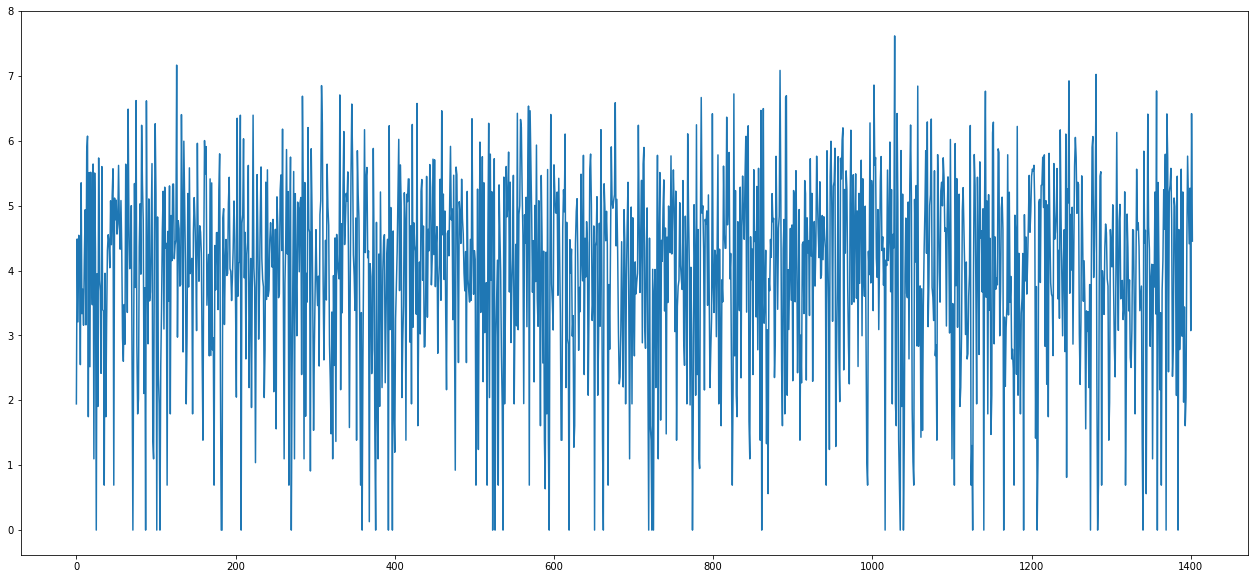

In [37]:
plt.figure(figsize=(22,10))
plt.plot(entropies.values())

In [41]:
import collections

In [43]:
counter=collections.Counter(map(int, entropies.values()))
counter

Counter({0: 70, 1: 105, 2: 153, 3: 318, 4: 382, 5: 294, 6: 77, 7: 4})

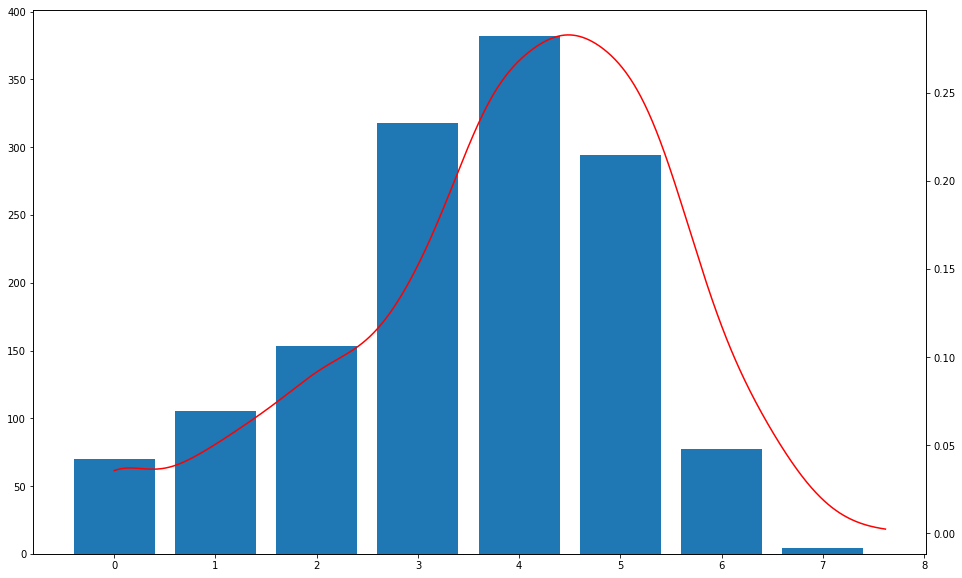

In [71]:
fig, ax1 = plt.subplots(figsize=(16,10))

data = sorted(entropies.values())
kde = gaussian_kde(data)
dist_space = np.linspace( min(data), max(data), 1000 )

ax1.bar(range(len(counter.values())), counter.values())
ax2 = ax1.twinx()
ax2.plot(dist_space, kde(dist_space), color='r')

In [78]:
for u in sorted(entropies, key=entropies.get):
    if entropies[u] > 0:
        print u, entropies[u]

emiliano.ruocco 0.12974069471942834
thejoyfulapproach 0.5613976039124685
julietmwalsh 0.5623351446188083
tamijojo 0.6365141682948128
alenaratnikova 0.6931471805599453
gpapage71 0.6931471805599453
tortuga_travels 0.6931471805599453
ojip81 0.6931471805599453
patanq 0.6931471805599453
hulyakuheylan 0.6931471805599453
len_cap 0.6931471805599453
tdjimage78 0.6931471805599453
loribaldwin5 0.6931471805599453
alessandromanzi 0.6931471805599453
bridgetcatterall 0.6931471805599453
the_wardrobe_sister 0.6931471805599453
francescosersale 0.6931471805599453
che_sara_ 0.6931471805599453
rawcontent 0.6931471805599453
tinapetersondz 0.6931471805599453
pinaryesilnacar 0.6931471805599453
krissnodgrass 0.6931471805599453
aydincekli 0.6931471805599453
briellabrown 0.6931471805599453
erika.pantaleo 0.6931471805599453
jfd_ca 0.6931471805599453
jrw1124 0.6931471805599453
eauditalie 0.8125445053464693
francosbar 0.911459223820847
gentlewomanoftheroad 0.9236324338185934
filippojnmarchetta 0.9502705392332347
na

gianni_s_boats_capri 3.1365398730253595
uhhella 3.14180415921323
medy1978 3.143379449351074
michele.wise 3.146311058882834
buonanotte_barbanera 3.1492496707426882
bokync 3.158695065831406
fairlelena 3.163597687797662
bardot_oc 3.1649855377779104
kingtatted_angel 3.169398557269481
kristenjoerger 3.178053830347946
adibi50 3.178053830347946
tattttp 3.1895072948817837
theseventhduchess 3.2078306206606344
tlashab 3.2101676771053294
gorgo_atelier 3.2188758248681983
evde_ek_is_icin_dm 3.2188758248681983
collectivedrift 3.2307438343079484
beth_maloney_ 3.2316325532025267
stephaniedoumtsis.makeup 3.2388818943729905
jessica.carvo 3.2444540412628635
pirotecnicamansi 3.2455830486349484
seealan 3.253436356380984
clearhosp25 3.2640212704669787
palomabluelondon 3.2736556772895766
kashandlana 3.278775956091594
iremulku 3.2826939972780647
jesugarrucho 3.282693997278065
thesurfclubmiamibeach 3.285725271225099
wanderlustful.dreams 3.2935783604412707
longlivethespys 3.306392965650922
pattersteph 3.3081461

slsstyle 4.623356296068738
nataliebrunell 4.6290155656602705
mattlynch40 4.631167248720137
lucalarenza 4.631629945097237
capo_0 4.631937342672848
sigrid7 4.632962055829678
casaangelinalifestyle 4.6333549047955636
laboratorioparavicini 4.633505803639682
mimilarag 4.6335163009435325
onmyheelssite 4.636886748419666
maricaevents 4.636900041703977
szilvia_mostdays 4.637758553208581
richardwengle 4.639518435129566
thayershardware 4.643484760023474
minasliristis 4.644473969992514
kearsleynotsearsley 4.647333556085283
gxgcollective 4.648768134291105
mikewill53 4.6505193051545115
gorgo_la_meduse 4.650716937390522
begumtellioglu 4.654360226918354
margaaaux.s 4.655567004334003
el_fitzo 4.657175635992353
mazjoseph 4.672630994404241
bethaniahome 4.675256874456001
paolaposh 4.67844283909993
manak419 4.67921816131707
l_ocora 4.68083821539169
geminavel 4.687493422362436
janepollymacky 4.688735912746064
giedre_life 4.689947599143066
concordpillows 4.6909559316132245
hair_sculptress_ 4.695841593885801
m

navalwives_tales 5.716461695832278
marielusa 5.718658302730685
twonewyork 5.724981757221743
saraisbixito 5.7260405455451995
sarahamandabray 5.731043003234599
kateloughtravel 5.73246900480276
labandco 5.736759200440192
nichefila 5.738990830753427
sven_maleszka 5.743542412519706
romexlove 5.7439430983878506
juln.gaman 5.7485146297435685
regina_morrone 5.750441900970032
gwenwinarno 5.756505254437042
vdphelsinki 5.757195168620286
lieutenantlanvin 5.75897683024608
storycollections 5.762639756101159
biaspeckham 5.764736877254499
jolenedetillion 5.7650727644502675
roulahatz 5.7688964530093205
suesloan1703 5.7778420460263975
ladynadialordgg 5.7778970092995845
naigregory 5.78421109711917
olgadoumet 5.7847064558746615
cordelaney 5.786357762519124
callmeliene 5.788118067816288
msrebeccaw 5.789600790634782
furtherexposure 5.794704452755292
melvin0619 5.796305640237259
ivanailinjova 5.797300244331942
ranakorgul 5.800274714238416
hesperfox 5.808404170995132
valeria.szabo 5.821476471553711
thetuscant

In [80]:
user_tag_matrix['thejoyfulapproach']

{'burningman': 2,
 'burningmanprinciple': 3,
 'corestabilization': 1,
 'lbgtpride': 1,
 'magic': 1,
 'mndflnyc': 1,
 'nurture': 1,
 'openheart': 1,
 'pickles': 1,
 'probioticsinfoods': 1,
 'purpose': 1,
 'selfexpression': 1,
 'selfgrowth': 1,
 'selflove': 1,
 'stayhydrated': 1,
 'steelism': 1,
 'the': 2,
 'thejoyfulaaproach': 1,
 'thejoyfulappprach': 1,
 'thejoyfulapproach': 314,
 'thejoyfulaproach': 1,
 'thejoyfulaprroach': 1,
 'thejoyfulretreats': 3,
 'tulummexico': 2}

In [82]:
user_tag_matrix['danielledrollins']

{'secondcup': 1,
 'packedforthewrongseason': 1,
 'gardeninspired': 7,
 'artlayout': 1,
 'ihavethisthingwiththings': 1,
 'partofthefamily': 1,
 'lovewhatyouwear': 4,
 'decoratingfearlessly': 3,
 'pulloverandgo': 1,
 'bohochic': 2,
 'graciousliving': 18,
 'brainoverload': 1,
 'scheming': 1,
 'colorfuldesign': 1,
 'happybirthday': 8,
 'antiquewallpaper': 1,
 'donutsfordesigners': 1,
 'marcheauxpuces': 1,
 'throwinthetrowel': 1,
 'youcansleepwhenyoudie': 1,
 'nevertellawomanitcantbedone': 1,
 'umhello': 1,
 'easybreezy': 1,
 'patioliving': 1,
 'fitzgeraldskirt': 2,
 'fraidydog': 1,
 'tablelinens': 1,
 'duchessofcambridge': 1,
 'collaborate': 1,
 'makethelawschange': 1,
 'myride': 1,
 'websitelessons': 1,
 'summerflower': 1,
 'holidayshopping': 1,
 'gracias': 1,
 'yellow': 1,
 'blueridgemountains': 2,
 'fireplace': 2,
 'comeseeme': 1,
 'alpine': 2,
 'giveamomahugtoday': 1,
 'jetset': 2,
 'iswearimalmostthere': 1,
 'wheelsup': 1,
 'ontheroadagain': 1,
 'cny2017': 1,
 'lifegoeson': 1,
 'white

In [90]:
pd.DataFrame.from_dict(entropies, orient='index', columns=['H']).to_csv('output/user_entropy.csv')

In [92]:
pd.DataFrame.from_dict(user_tag_matrix, orient='index').to_csv('output/test-3/user_tag_matrix.csv')